In [1]:
#Step 1: Import Required Libraries
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Step 2:  Load and Explore the Dataset
#Define your own column names
column_names = ['SL', 'SW', 'PL', 'PW', 'species']
# where SL =sepal_length, SW =sepal_width, PL=petal_length, PW=petal_width
# Load the dataset (replace 'iris.csv' with the actual dataset file)
data = pd.read_csv('iris.data',header=None, names=column_names)
# Explore the dataset
print(data.head())
print(data.info())

    SL   SW   PL   PW      species
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [15]:
#Step 3:  Data Preprocessing
# Separate features (X) and target variable (y)
#X= data.iloc[:, :-1]
X = data.drop('species', axis=1) # axis= 1 means all the columns should be dropped while axis = 0 means row
print(X)

      SL   SW   PL   PW
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


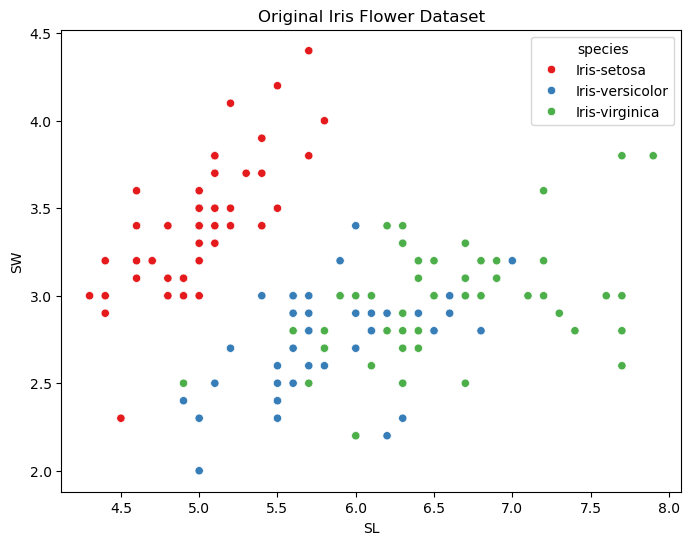

In [28]:
# Visualize the original dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SL', y='SW', hue='species', data=data, palette='Set1')
plt.title('Original Iris Flower Dataset')
plt.show()

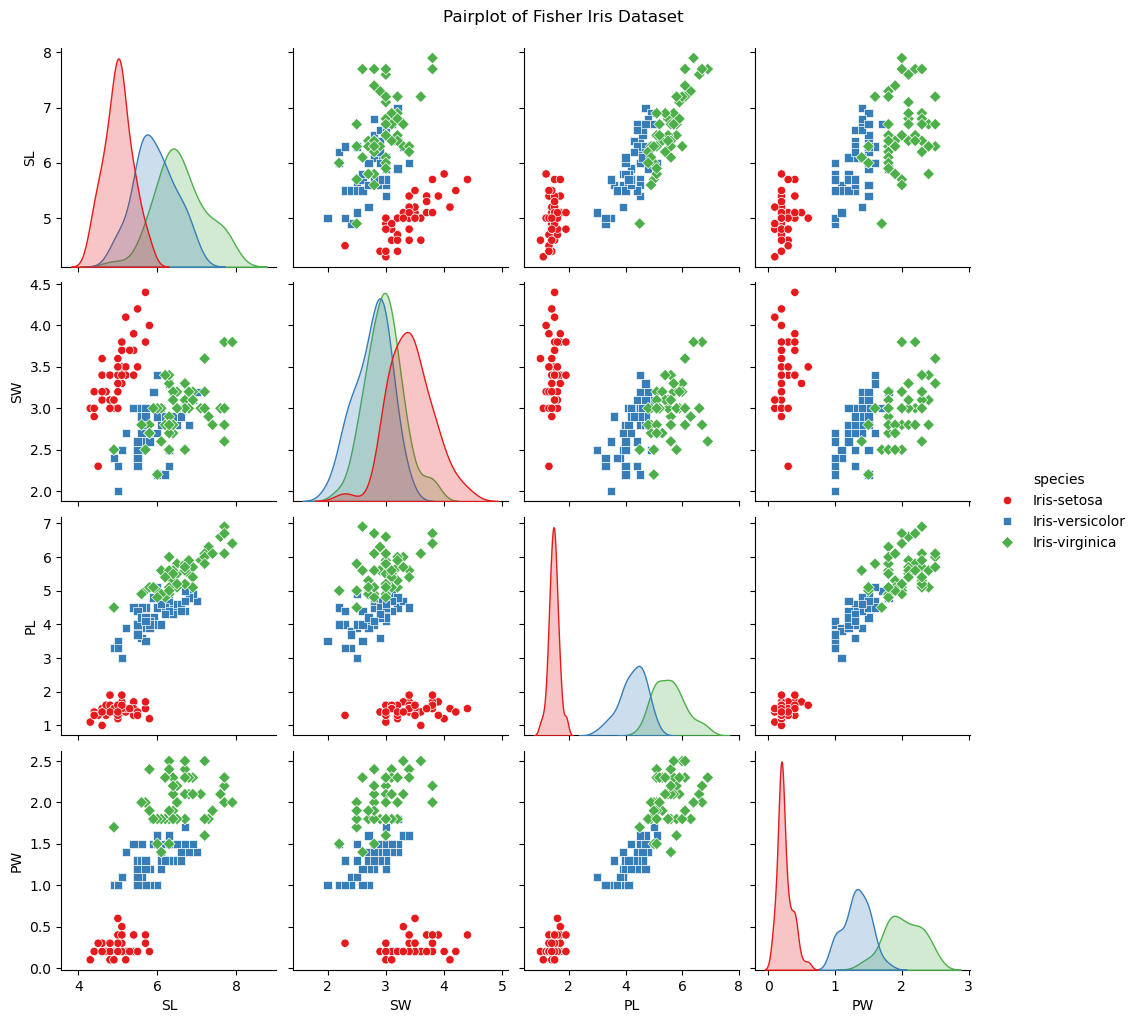

In [24]:
# Load the Fisher Iris dataset
#iris = sns.load_dataset('iris')

# Visualize the data using pairplot
sns.pairplot(data, hue='species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Fisher Iris Dataset', y=1.02)
plt.show()

In [17]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
#Step 4:  Perform PCA for Dimensionality Reduction
# Initialize PCA with the desired number of components (e.g., 2)
pca = PCA(n_components=2)
# Fit and transform the data to the lower-dimensional space
X_pca = pca.fit_transform(X_scaled)

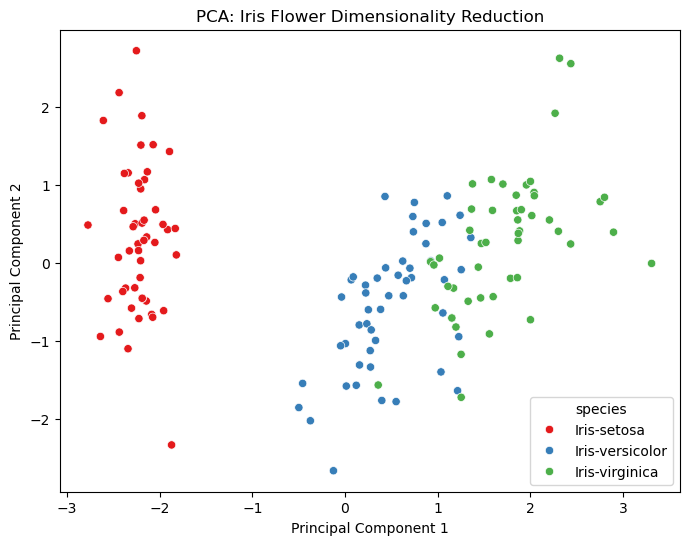

In [22]:
#Step 5:  Visualize the Data in the Reduced Dimensional Space
# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['species'] = data['species']
# Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='species', data=pca_df, palette='Set1')
plt.title('PCA: Iris Flower Dimensionality Reduction')
plt.show()